In [14]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import random
from PIL import Image



from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV


In [2]:
# Specify the directory path
directory_path = '/Users/karansagar/Downloads/archive/Training_Set/Training_Set/Training'

# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]



# sort the order of the list by the numerical part 
file_names.sort(key=lambda x: int(x.split('.')[0]))

print(file_names)

['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png', '101.pn

In [3]:
import cv2

def get_image_size(image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    return width, height

# Example usage
# image_path = 'path/to/your/image.jpg'
# width, height = get_image_size(image_path)
# print(f"Width: {width}, Height: {height}")

In [4]:
def print_unique_values(lst):
    unique_values = set(lst)
    for value in unique_values:
        print(value)

In [5]:
# def print_first_occurrence_indices(image_sizes):
#     seen = set()  # To track seen width-height combinations
#     first_occurrence_indices = []  # To record the indices of first occurrences

#     for index, (width, height) in enumerate(image_sizes):
#         if (width, height) not in seen:
#             seen.add((width, height))
#             first_occurrence_indices.append(index)

#     # Print indices of the first occurrences
#     for index in first_occurrence_indices:
#         width, height = image_sizes[index]
#         print(f"Index: {index} -> Width: {width}, Height: {height}")


# print_first_occurrence_indices(w_and_h)

In [6]:
# from PIL import Image
# import os

# def resize_images(output_folder, size):
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)
    
#     for file in file_names:
#         path = '/Users/karansagar/Downloads/archive/Training_Set/Training_Set/Training/' + file
#         img = Image.open(path)
#         img_resized = img.resize(size)
            
#         output_path = os.path.join(output_folder, file)
#         img_resized.save(output_path)
#         #print(f"Resized and saved: {output_path}")


# output_folder = '/Users/karansagar/Desktop/Retina_Training'
# size = (256, 256)  # Desired size (width, height)
# resize_images(output_folder, size)

KeyboardInterrupt: 

In [5]:
data = []

for file in file_names:
    file_name = file
    path = '/Users/karansagar/Desktop/Retina_Training/' + file_name
    image = Image.open(path)
    image = np.asarray(image)
    image_shape = image.shape
    flattened_image = image.flatten()
    data.append(flattened_image)

In [6]:
df = pd.read_csv('/Users/karansagar/Downloads/archive/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
y = df['Disease_Risk']

In [7]:
# y_50 = np.vstack(y_50)
y = np.vstack(y)


In [8]:
pca = PCA(n_components=0.90)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler

X_train_scaled = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test) 
X_test_pca = pca.transform(X_test_scaled)

Below we're using Bayesian Optimization to find the optimal hyperparameters.

In [60]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

# Define the model
model = RandomForestClassifier()

# Define the hyperparameter search space
search_space = {
    'n_estimators': (10, 1500),
    'max_depth': (1, 1000),
    'max_leaf_nodes': (10, 2000)
}

# Perform Bayesian optimization
opt = BayesSearchCV(model, search_space, n_iter=32, cv=5, scoring='accuracy')
opt.fit(X_train_pca, y_train)

# Best parameters
print(f"Best Parameters: {opt.best_params_}")
print(f"Best Score: {opt.best_score_}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

Best Parameters: OrderedDict({'max_depth': 333, 'max_leaf_nodes': 1092, 'n_estimators': 660})
Best Score: 0.8365878421253015


In [12]:
rnd_clf = RandomForestClassifier(n_estimators = 660, max_depth = 333, max_leaf_nodes = 1092, random_state = 42)
rnd_clf.fit(X_train_pca, y_train)

y_pred_rnd = rnd_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_rnd)
print(f"Accuracy: {accuracy}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.84375


In [13]:
cm_rnd = confusion_matrix(y_test, y_pred_rnd, labels=rnd_clf.classes_)
print("Confusion Matrix:")
print(cm_rnd)

Confusion Matrix:
[[ 24  50]
 [ 10 300]]


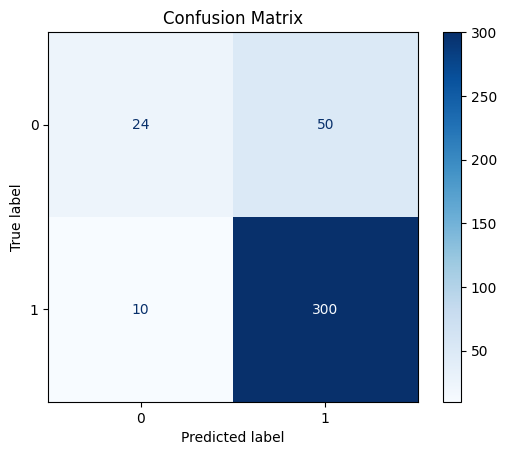

In [15]:
# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rnd, display_labels=rnd_clf.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [17]:
# Initialize the SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_clf.fit(X_train_pca, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [18]:
# Make predictions on the test set
y_pred_sgd = sgd_clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred_sgd))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.71      0.32      0.44        74
           1       0.86      0.97      0.91       310

    accuracy                           0.84       384
   macro avg       0.78      0.65      0.68       384
weighted avg       0.83      0.84      0.82       384



In [19]:
cm_sgd = confusion_matrix(y_test, y_pred_sgd, labels=sgd_clf.classes_)
print("Confusion Matrix:")
print(cm_sgd)

Confusion Matrix:
[[ 24  50]
 [ 35 275]]


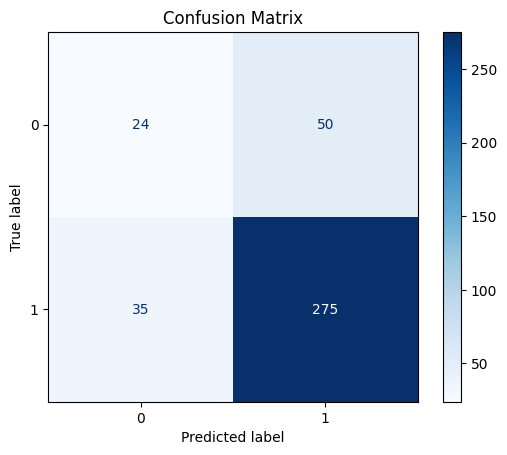

In [20]:
# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=sgd_clf.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for SGD Classifier')
plt.show()

In [30]:
# Initialize the SGDClassifier
sgd_clf = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)

# Train the model
sgd_clf.fit(X_train_pca, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', max_iter=100, random_state=42)

In [31]:
# Make predictions on the test set
y_pred_sgd = sgd_clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred_sgd))

Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.32      0.51      0.39        74
           1       0.86      0.74      0.80       310

    accuracy                           0.70       384
   macro avg       0.59      0.63      0.60       384
weighted avg       0.76      0.70      0.72       384



In [32]:
cm_sgd = confusion_matrix(y_test, y_pred_sgd, labels=sgd_clf.classes_)
print("Confusion Matrix:")
print(cm_sgd)

Confusion Matrix:
[[ 38  36]
 [ 81 229]]


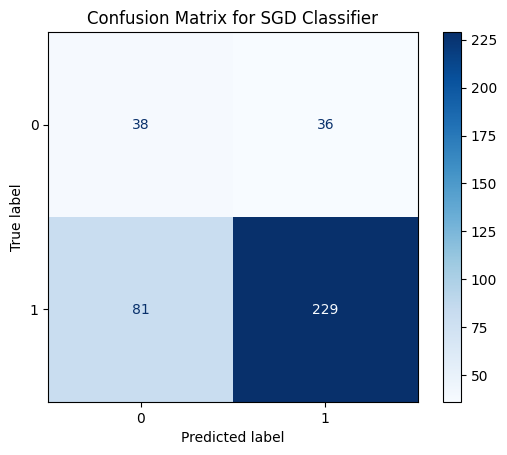

In [33]:
# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=sgd_clf.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for SGD Classifier')
plt.show()

In [34]:
import numpy as np

# Example data (replace with your actual data)
# X = ...  # Your feature matrix
# y_true = ...  # True labels
# y_pred = ...  # Predicted labels

# Identify the instances where true label is 1 but predicted label is 0
condition = (y_test == 1) & (y_pred_sgd == 0)

# Extract the entries from X where the condition is met
false_negatives = X_train_pca[condition]

# # Optionally, also extract the true labels and predicted labels for these entries
# true_labels_false_negatives = y_pred_sgd[condition]
# predicted_labels_false_negatives = y_pred_sgd[condition]

# Print or use the false negatives
print("Entries where true label was 1 but predicted label was 0:")
print(false_negatives)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1536 but corresponding boolean dimension is 384

In [37]:
X_train_pca[0]

array([ -45.87286127, -145.64615994,  -69.52018107,    1.99979879,
         83.51134935,  -54.00613989,   18.11245616,   22.94635669,
        -51.65100244,  -18.16903887,   22.15411243,  -28.55934396,
        -32.05278486])